#Análisis de sentimientos hacia candidatos a la Intendencia de Montevideo usando Twitter e inteligencia artificial
Por: Guillermo Blanco

------------------------------------------------------------------------------

# Introducción

La idea del presente documento es analizar los sentimientos expresados por diversos usuarios de Twitter uruguayos hacia los candidatos a la Intendencia de Montevideo los 10 días anteriores a la elección departamental y los 3 días posteriores a la misma. Para esto se utilizará un modelo de procesamiento del lenguaje presentado por Google en 2018 y adaptado al español por investigadores de la Universidad de Chile en 2020. Además, en este trabajo se intenta ajustar el mismo a expresiones uruguayas haciendo uso de evaluaciones de apps de la tienda Google Play. Como base para este experimento se utilizó el siguiente artículo: [Análisis de sentimientos usando BERT en español](https://benjad.github.io/2020/08/04/clasificador-sentimiento-BERT/)

# Teoría


## Análisis de sentimientos previo al *deep learning*
Hasta hace pocos años, los análisis de sentimientos hechos con grandes volúmenes de texto se hacían utilizando un método conocido como Bayes ingenuo o *naive Bayes* en inglés. El mismo necesitaba de un conjunto de datos extraídos del entorno donde debía ser aplicado y etiquetados según el sentimiento que representaran. A partir de esto, se generaba una lista con todas las palabras que se encontraban en los cuerpos de texto utilizados para su entrenamiento y se asociaba cada palabra con una probabilidad que la misma tuviera un sentimiento positivo o negativo. Si se deseaba saber el sentimiento de una frase, se obtenía una especie de promedio de las probabilidades de las palabras. ¿Cuál era el problema? Que muchas veces el contexto en que se encuentra una palabra termina generando su significado. Por ejemplo, `no felíz` podría generar un sentimiento positivo dado que `felíz` es más `positivo` que `no` pero, si leemos atentamente, entenderemos que `no felíz` está mucho más cerca de `infelíz` que del resultado que estaríamos obteniendo con el clasificador de Bayes. Lo mismo puede pensarse con palabras que adquieren significado según el contexto: no es lo mismo un `banco` de plaza que un banco de sangre o dinero.

## Actualidad

En los últimos 10 años se han producido múltiples avances en el área del procesamiento del lenguaje, avances que han venido de la mano con la masificación de las redes neuronales artificiales aplicadas a los datos, técnica que aparenta desafiar a métodos como el recién nombrado. El avance que proporcionan estas redes es que son capaces de resolver problemas igual o más complejos que los abordables por los métodos estadísticos previos pero teniendo datos mucho menos *pulidos*. A cambio, mayor es la necesidad de poder de cálculo de las computadoras encargadas del entrenamiento de estos modelos.

Una característica distintiva de las redes neuronales artificiales es que se organizan en capas de parámetros que se van adaptando a los datos hasta arrojar predicciones que sean certeras en la mayoría de los casos. Si bien aún no se conoce perfectamente qué ocurre dentro de cada capa de la red neuronal, algunas investaciones encuentran que, a medida que se avanza entre las capas, los resultados obtenidos se van perfeccionando progresivamente. De esta forma, las últimas capas de una red neuronal le aportan a la misma la información más minuciosa que tiene que tener para alcanzar una cierta perfección.

Lo anterior permite algo interesante: pensemos en un modelo de redes neuronales capaz de obtener el significado de las palabras. Si bien en toda hispanoamérica se habla español, algunos significados fluctúan: no es lo mismo una zapatilla en Uruguay que en Argentina, por ejemplo. De acuerdo a la conclusión alcanzada en el párrafo anterior, estas precisiones se encontrarían en las últimas capas de la red neuronal. Ante esto, si deseáramos una inteligencia artificial capaz de entender el español adaptado al Uruguay tenemos dos posibilidades: entrenarla completamente con textos escritos por uruguayos o tomar un modelo entrenado con algún dialecto del español, cortarle la o las últimas capas y sustituirla por una que tenga textos uruguayos. Esto sería mucho más barato de implementar, dado que los parámetros de las capas no alteradas no necesitan calcularse nuevamente y solo se alteran las últimas. Además, los modelos de *deep learning* requieren grandes volúmenes de datos para entrenar sus múltiples capas: acá no es necesario porque solo entrenamos una. Esta opción es lo que se conoce como transferencia de aprendizaje o *transfer learning* e implica tomar un modelo general preentrenado y adaptarlo a la contexto deseado.

### BERT y BETO

En 2018 Google presentó y liberó un modelo de aprendizaje profundo encargado de procesar lenguaje humano conocido como BERT. BERT es un modelo de lenguaje general capaz de entender la forma en que se expresan los seres humanos y que después es adaptado a tareas particulares tales como reconocimiento de voz, autocompletado de texto, clasificación de textos, chatbots, aplicación de respuesta a preguntas, entre otras que puedan nutrir los resultados del buscador nombrado. 

En su interior conviven diversas tecnologías capaces de computar valores que le permiten entender el significado de las palabras a partir de un gran volúmen de textos utilizados para su entrenamiento pero considerando el entorno en que son pronunciadas, algo que métodos como el clasificador de Bayes no era capaz. A diferencia de modelos de redes neuronales previos, no se define el contexto de una forma fija sino que este es *adivinado* en el momento de su entrenamiento.

Para el objetivo planteado aquí, BERT presenta una desventaja: solo sabe inglés. Tomando como punto de partido el *paper* que acompañó la presentación del mismo, investigadores de la Universidad de Chile se propusieron entrenar su BERT pero solamente con textos en español. Los resultados fueron presentados sobre finales de 2019 y principios de 2020: nacía BETO.

# Datos y entrenamiento

Para poder analizar sentimientos vertidos hacia los candidatos a Intendente de Montevideo en los diez días antes de las elecciones, se toma a BETO preentrenado y se lo adapta para entender mejor expresiones propias de los uruguayos. Para eso se tomó una lista de aplicaciones de Android muy utilizadas en Uruguay[1] y se extrajo el texto de las reviews y la valoración en escala 5 que realizaron múltiples usuarios. Dicha extracción fue hecha por medio de *scrapping* utilizando [Selenium](https://www.selenium.dev/).

Pese a la escala original de los datos, se probó un modelo de 5 categorías y los resultados no fueron aceptables. Por eso, se optó por sintetizarlas en 3 categorías, pasando a ser:
* 1 y 2 estrellas: **malo** (clase identificada con el número 0)
* 3 estrellas: **neutro** (clase identificada con el número 1)
* 4 y 5 estrellas: **bueno** (clase identificada con el número 2)

Con la adaptación de esa última capa, se entrena el modelo y luego se lo utiliza para clasificar un conjunto de twits sobre 3 de los 4 candidatos de la elección antes nombrada. Los mismos fueron recolectados en vivo haciendo uso de la herramienta [twitter sniffer](https://github.com/guibla236/twitter-sniffer), también elaborada para este experimento. Al final, se presenta un gráfico que muestra la evolución diaria del promedio de la popularidad expresada en los twits.

Valen algunas precisiones sobre este conjunto de datos: solo fue posible extraer aquellos que informaban sobre la ubicación geográfica desde la cual fueron emitidos, habiéndose utilizado para la recolección a todo el Uruguay. Una mejor recolección de los datos tendría que visitar distintos twits buscando comentarios respecto de alguna personalidad. Sin embargo, lo aleatorio de la selección puede aportar algún indicador interesante. 

Otra precisión que debe hacerse sobre los datos es que se eliminó al candidato Daniel Martínez por una simple razón: muchas veces se lo nombra solo por el nombre o solo por el apellido y Daniel y Martínez hay muchos. Por esto se optó por eliminarlo y mantener apellidos menos comunes como los de los otros tres candidatos.

# Implementación

Habiendo hecho las aclaraciones metodológicas pertinentes, se procede a la implementación. Nótese que los datos cargados se encuentran en la carpeta donde fue extraído este *notebook*, por lo que si se desea ejecutarlo nuevamente de forma local o en herramientas como Google Colab, habrá que cargar los datos de forma manual.

### Instalación de la biblioteca para que descarga y gestiona modelos preentrenados

In [1]:
!pip install transformers # Permite trabajar con modelos preentrenados de https://huggingface.co/

### Importamos todas las bibliotecas y funciones que utilizaremos

In [2]:
import re
import torch
import os
import torch.optim
import time
import datetime
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import  BertTokenizer
from transformers import BertForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, SequentialSampler
from sklearn.metrics import confusion_matrix

### Seleccionamos el dispositivo donde se va a entrenar el modelo.
Opciones: 
* CPU
* GPU (CUDA)

In [3]:
run_on = 'cuda'
device = torch.device(run_on)

### Marcamos el directorio donde se buscarán los archivos y cargamos las reviews de Google Play

In [4]:
PATH = os.getcwd()
df = pd.read_csv(PATH+'/reviewsclean.csv')
df.head(5)

,Unnamed: 0,clean_reviews,class,stars
0,0,"Muy útil, solo que no puedo utilizarlo en mi n...",0,1
1,1,Muy buena. Solo una sugerencia: Si pueden agre...,2,5
2,2,faltan agregar las nuevas paradas del borro y ...,2,4
3,3,Sería bueno que se pueda agregar una sección d...,1,3
4,4,Que pasa que el 328 no aparece en la App y cua...,0,1


## Distribución de los datos

En el siguiente gráfico se puede observar que predominan las valoraciones extremas.

Si se cambia *class* por *stars* en el código se puede ver que esto ocurre tanto para la valoración con estrellas como en la abstracción hecha, recordemos:
* Calificaciones 1 y 2: $0$ (*Malo*)
* Calificación 3: $1$ (*Neutro*)
* Calificación 4 y 5: $2$ (*Bueno*)

[]

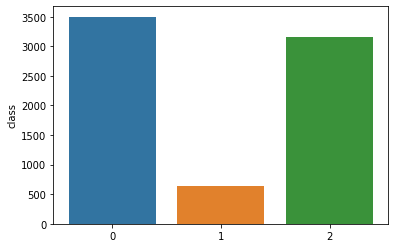

In [5]:
# Hacemos un gráfico para ver la distribución de calificaciones
counts = df['class'].value_counts()
ax = sns.barplot(x=df['class'].unique(), y=counts)
ax.plot()

###Ahora extraemos los datos del *dataframe* y los dividimos en conjuntos de entrenamiento y pruebas.

In [6]:
# Extraemos las columnas necesarios del conjunto de datos
reviews = df['clean_reviews']
sentiment = df['class']

# Dividimos el dataset entre datos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(reviews, 
                                                  sentiment,
                                                  stratify=sentiment, # Mantenemos las proporciones de las clases de sentimientos.
                                                  test_size=0.2, # Proporción del dataset que se destina a validación
                                                  random_state=42)

# Mostramos al usuario el tamaño de cada conjunto
print('Muestras del conjunto de entrenamiento : {}'.format(len(X_train)))
print('Muestras del conjunto de validación : {}'.format(len(X_val)))

Muestras del conjunto de entrenamiento : 5838
Muestras del conjunto de validación : 1460


###El siguiente paso es la tokenización
Este proceso consiste en transformar las palabras de los distintos *reviews* en características (números) que representen un significado para BETO.

Para eso, tenemos que descargar el tokenizador del modelo preentrenado.

In [7]:
# Tokenizacion (transformación de las palabras en características del modelo BETO)

tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased",
                                          do_lower_case=True)

def preprocessing(dataset):
    input_ids = []
    attention_mask = []

    for doc in dataset:
      encoded_doc = tokenizer.encode_plus(doc,
                                          add_special_tokens=True,
                                          max_length=128,
                                          truncation=True,
                                          padding="max_length")
        
      input_ids.append(encoded_doc['input_ids'])
      attention_mask.append(encoded_doc['attention_mask'])

    return (torch.tensor(input_ids), torch.tensor(attention_mask))

# Aplicamos el preprocesamiento al dataset
X_train_inputs, X_train_masks = preprocessing(X_train)
X_val_inputs, X_val_masks = preprocessing(X_val)

# Mostramos la cantidad máxima de palabras en cada juicio.
max_len = max([torch.sum(sen) for sen in X_train_masks])
print('Cantidad máxima de tokens (palabras) en una oración {0}'.format(max_len))

Cantidad máxima de tokens (palabras) en una oración 128


Para optimizar el proceso de aprendizaje se dividen los conjuntos de datos en pequeños subconjuntos (*batches*) de 32 muestras. Esto permite que la actualización de los parámetros de los modelos sea más precisa, lo que también sirve para atacar el problema del *overfitting*.

In [8]:
# Data loaders
batch_size = 32

A continuación se adaptan los datos para que sean debidamente tratados por PyTorch (la biblioteca encargada del entrenamiento del modelo).

In [9]:
y_train_labels = torch.tensor(y_train.values)
y_val_labels = torch.tensor(y_val.values)

def dataloader(x_inputs, x_masks, y_labels):
    data = TensorDataset(x_inputs, x_masks, y_labels)
    sampler = SequentialSampler(data)
    dataloader = DataLoader(data, sampler=sampler,
                 batch_size=batch_size,
                 num_workers=0)
    return dataloader

train_dataloader = dataloader(X_train_inputs, X_train_masks,
                   y_train_labels)
val_dataloader = dataloader(X_val_inputs, X_val_masks, 
                 y_val_labels)

Marcamos una semilla para asegurar que los resultados sean reproducibles cuando se intente ejecutar nuevamente el presente *notebook*.

In [10]:
# set random seed
def set_seed(value):
    random.seed(value)
    np.random.seed(value)
    torch.manual_seed(value)
    torch.cuda.manual_seed_all(value)
set_seed(42)

Creamos el modelo a partir del preentrenado y el objeto que contiene la función de optimización con los parámetros para su entrenamiento.

In [11]:
# Create model and optimizer
model = BertForSequenceClassification.from_pretrained(
        "dccuchile/bert-base-spanish-wwm-uncased",
         num_labels=3,
         output_attentions=False,
         output_hidden_states=False)

optimizer = AdamW(model.parameters(),
                  lr = 4e-5,
                  eps = 1e-6
                  )

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Indicamos que queremos que se entrene en la GPU, que se haga en 3 *épocas* (pasadas consecutivas de todos los *batches*) y creamos el *scheduler*: un objeto encargado de reducir la tasa de aprendizaje a medida que se va entrenando el modelo, algo que también ataca el *overfitting*.

In [12]:
if run_on == 'cuda':
    model.cuda()

# Define number of epochs
epochs = 3

total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
            num_warmup_steps = 0, 
            num_training_steps = total_steps)

Definimos funciones accesorias encargadas de medir formatear la demora de cada época del entrenamiento y de computar la exactitud de los parámetros del modelo al intentar predecir los sentimientos del conjunto de validación.

In [13]:
#fuction to format time
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

#function to compute accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

#variable to plot the confusion matrix
conf = []

Por último, definimos la función de entrenamiento, función que también se encargará de la validación de cada época.

In [14]:
def entrenar(n_epochs, training_dataloader,
             validation_dataloader):
    # ========================================
    #               Entrenamiento 
    # ========================================
    print('======= Entrenando =======')

    max_step_t = len(training_dataloader)
    max_step_v = len(validation_dataloader)

    for epoch_i in range(0,n_epochs):
        # Para cada época...
        print("")
        print('======= Epoch {:} / {:} ======='.format(
             epoch_i + 1, epochs))
        # Marcamos la hora de inicio para ver cuánto demoramos.
        t0 = time.time()
        # Reseteamos el valor de la pérdida para la época a utilizar.
        total_loss = 0
        # Ponemos el modelo en modo entrenamiento.
        model.train()
        # Para cada subconjunto (minibatch) del conjunto de entrenamiento:
        
        for step, batch in enumerate(training_dataloader):
            batch_loss = 0
            # Desarmamos el dataloader en:
            #   [0]: input ids (índices en el diccionario de tokens de BETO),
            #   [1]: attention masks (cuánta atención se le presta a cada token en la oración), 
            #   [2]: labels (el resultado que se debería obtener: el dato y)
            b_input_ids,b_input_mask, b_labels = tuple(
                                t.to(device) for t in batch)

            # Limpiamos los gradientes para el presente batch
            model.zero_grad()

            # Propagación hacia adelante en las capas
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

            # Sacamos la pérdida del presente minibatch y lo cargamos en...
            loss = outputs[0]
            batch_loss += loss.item()
            total_loss += loss.item()

            # Propagamos hacia atrás
            loss.backward()

            # Cortamos la norma de los gradientes en 1.0 (evita que el gradiente se haga explosivo)
            torch.nn.utils.clip_grad_norm_(model.parameters(),
                                            1.0)

            # Actualizamos los parámetros
            optimizer.step()
            scheduler.step()
            if step %50 == 0 or step==max_step_t:
              print('Nº Batch: {0}/{1} | batch loss: {2} | avg loss: {3}'.format(step,
                                                                                max_step_t,
                                                                                batch_loss,
                                                                                total_loss/(step+1)))
        # Calculamos la pérdida promedio en la época actual del conjunto de entrenamiento
        avg_train_loss = total_loss / len(train_dataloader)


        print("")
        print("  Average training loss: {0:.2f}".
             format(avg_train_loss))
        print("  Training epoch took: {:}".format(
              format_time(time.time() - t0)))

        # ========================================
        #               Validación
        # ========================================
        # Después de entrenar una época, medimos su capacidad de predecir y acertar.

        print("")
        print("======= Validación =======")

        t0 = time.time()

        # Ponemos el modelo en modo validación
        model.eval()

        # Declaramos variables
        eval_loss, eval_accuracy = 0, 0
        all_logits = []
        all_labels = []

        # Evaluamos los datos por minibatches
        for step, batch in enumerate(validation_dataloader):
            
            # Repetimos el proceso de dividir los datos del dataloader
            # y cargarlos en el dispositivo que hará la validación.
            #   [0]: input ids, 
            #   [1]: attention masks,
            #   [2]: labels

            b_input_ids, b_input_mask, b_labels = tuple(
                                t.to(device) for t in batch)


            # No queremos que el modelo compute gradientes
            with torch.no_grad():
                # Generamos las predicciones del modelo
                outputs = model(b_input_ids,
                                token_type_ids=None,
                                attention_mask=b_input_mask)

            # ...las extraemos
            logits = outputs[0]

            # Movemos los logits (datos previos a función de activación) a la CPU
            logits = logits.detach().cpu().numpy()
            b_labels = b_labels.to('cpu').numpy()

            # Guardamos los logits y las etiquetas con las clasificaciones hechas
            # Nos serán útiles para la matriz de confusión.
            predict_labels = np.argmax(
                             logits, axis=1).flatten()
            all_logits.extend(predict_labels.tolist())
            all_labels.extend(b_labels.tolist())

            # Calculamos la exactitud de este batch
            tmp_eval_accuracy = flat_accuracy(
                                logits, b_labels)
            # Calculamos la exactitud acumulada hasta la época actual.
            eval_accuracy += tmp_eval_accuracy

        # Mostramos la exactitud final para esta epoch
        print("  Accuracy: {0:.2f}".
              format(eval_accuracy / (step+1)))
        print("  Validation took: {:}".format(
             format_time(time.time() - t0)))

    # Mostramos la matriz de confusión
    conf = confusion_matrix(
           all_labels, all_logits, normalize='true')
    print("")
    print("Training complete")
    return conf

### Ahora, simplemente, le decimos al modelo que se entrene
...y nos dé la matriz de confusión

In [15]:
conf = entrenar(epochs, train_dataloader, val_dataloader)

======= Entrenando =======

======= Epoch 1 / 3 =======
Nº Batch: 0/183 | batch loss: 1.1028228998184204 | avg loss: 1.1028228998184204
Nº Batch: 50/183 | batch loss: 0.6058868169784546 | avg loss: 0.6229513381041732
Nº Batch: 100/183 | batch loss: 0.4175738990306854 | avg loss: 0.5674952728913563
Nº Batch: 150/183 | batch loss: 0.5733855366706848 | avg loss: 0.5277767672838755

  Average training loss: 0.52
  Training epoch took: 0:02:09

======= Validación =======
  Accuracy: 0.85
  Validation took: 0:00:12

======= Epoch 2 / 3 =======
Nº Batch: 0/183 | batch loss: 0.3138192594051361 | avg loss: 0.3138192594051361
Nº Batch: 50/183 | batch loss: 0.3906358778476715 | avg loss: 0.3954590471351848
Nº Batch: 100/183 | batch loss: 0.3065154552459717 | avg loss: 0.370406573656762
Nº Batch: 150/183 | batch loss: 0.3565369248390198 | avg loss: 0.3432357960584148

  Average training loss: 0.34
  Training epoch took: 0:02:07

======= Validación =======
  Accuracy: 0.84
  Validation took: 0:00:1

### Generamos el cuadro de confusión

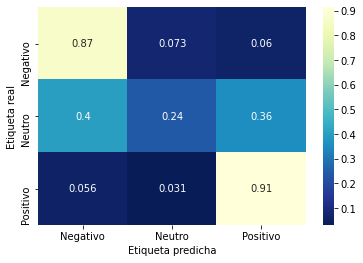

In [16]:
ticks = ['Negativo', 'Neutro', 'Positivo']
ax = sns.heatmap(conf, annot=True, xticklabels=ticks, yticklabels=ticks, cmap='YlGnBu_r')
ax.set(xlabel='Etiqueta predicha', ylabel='Etiqueta real')
plt.show()

La anterior figura nos permite ver que el modelo acierta en las clasificaciones extremas pero se le dificulta en las frases neutras, algo que también puede estar influido por la menor cantidad de ejemplos neutros con lo que es entrenado.

# Resultados

Para los resultados necesitamos una función que cargue el modelo, tokenice el contenido de cada twit, identifique la predicción y nos devuelva una valoración del mismo que sea útil para un promedio, siendo esta $-1$ para un twit negativo, $0$ para uno neutro y $1$ para uno positivo.

In [17]:
from textwrap import wrap

def clasificar_sentimiento(texto):
  encoding_review = tokenizer.encode_plus(
      texto,
      max_length = 115,
      truncation = True,
      add_special_tokens = True,
      return_token_type_ids = False,
      padding="max_length",
      return_attention_mask = True,
      return_tensors = 'pt'
      )
  
  input_ids = encoding_review['input_ids'].to(device)
  attention_mask = encoding_review['attention_mask'].to(device)
  output = model(input_ids, attention_mask)
  _, prediction = torch.max(output.logits, dim=1)
  
  if prediction.item() == 0:
    return -1
  elif prediction.item() == 1:
    return 0
  elif prediction.item() == 2:
    return 1

Acto seguido, cargamos el conjunto de datos que tenemos que evaluar y observamos su contenido.

A continuación, averiguamos e insertamos en el *dataframe* el sentimiento predicho a cada twit y generamos un diccionario que indique el promedio de valoración sentimental por día de cada candidato.

In [18]:
df = pd.read_csv(PATH+"/tweets.csv").dropna()
df.head(5)

,Unnamed: 0,texto,fechas,candidato,nombre_lugar
0,223,En el comité estuvimos hablando con las juvent...,17,Cosse,"Montevideo, Uruguay"
1,530,Voto a pq a me Gusta al Senado Mujer con Ovari...,17,Cosse,"Montevideo, Uruguay"
2,578,Acuérdense de ellos 👇,17,Cosse,"Montevideo, Uruguay"
3,938,Este ni sabe de lo que habla so. Todos burros,17,Cosse,"Montevideo, Uruguay"
4,945,Tara tara tara,17,Cosse,"Montevideo, Uruguay"


In [19]:
sentimientos = []

for index, row in df.iterrows():
    sentimientos.append(clasificar_sentimiento(row["texto"]))

df["sentimiento"] = sentimientos

candidato = {}
for cand in df.candidato.unique():
    cond_cand = df.candidato == cand
    promedio_por_fecha = {}
    for fecha in df.fechas.unique():
        cond_fecha = df.fechas==fecha
        promedio_por_fecha[fecha] = df[cond_fecha & cond_cand].sentimiento.mean()
        
    candidato[cand] = promedio_por_fecha



# Resultados

Generamos el gráfico...

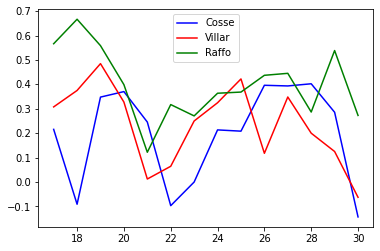

In [20]:
color_cand = {
    "Cosse":"Blue",
    "Raffo": "Green",
    "Villar": "Red"
    }
    
for cand in df.candidato.unique():
    sns.lineplot(x=candidato.get(cand).keys(),
                 y=candidato.get(cand).values(),
                 color=color_cand[cand],
                 label=cand)

Lo que se puede observar en el anterior gráfico es que, si bien existen distintas fluctuaciones, la candidata Carolina Cosse es quien presenta las mayores referencias negativas en Twitter para el período considerado y con las restricciones de datos que se trabajó. Levemente mejor se encontró el candidato Álvaro Villar, que presenta una notable caída hacia (y sobretodo luego) del acto eleccionario. Quién se mantiene estable antes y después de las elecciones fue Laura Raffo, candidata que parecería haber tenido algún shock negativo en su campaña alrededor del día 20 pero que luego se fue recuperando.

# Conclusiones

Independientemente de los resultados obtenidos, se intentó poner en práctica un modelo BERT en español aplicado al caso político uruguayo. Los resultados no aparentan ser tan descabellados teniendo en cuenta que se consideraron datos a nivel nacional y que la marca *Frente Amplio* pareció tener una caída en su popularidad en el último período electoral, hecho que puede haber influenciado que sus candidatos fueran *peor vistos* por el *twittero promedio*.

Sin embargo, algunas mejoras pueden ser introducidas. En particular, la mayor debilidad del trabajo hecho es que los datos de entrenamiento son de productos de consumo (*apps*) y lo que se busca predecir son elecciones políticas. Desarrollar un conjunto de datos propio de esta área y explotar otros sentimientos menos generales que los usados en este trabajo, son posibles con modelos como BERT.

Pese a las debilidades, la evaluación de campañas utilizando inteligencia artificial y *big data* es una técnica muy reciente y de la que se escuchará durante toda la presente década. Se espera que este trabajo sea un buen ejemplo de lo que son capaces estas herramientas.

--------------------------------------------------------------------------------